Kelompok 8:

2440045533 - Muh Ikram Ramadan

2440057685 - Bryan Marcello Layvin

2440050874 - Michael Julian

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

import datasets from kaggle

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c fake-news

In [ ]:
!unzip fake-news.zip

# Train (train.csv)

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Labels:
>**0**  ->  *Real*

>**1**  ->  *Fake*

## Data Cleaning

In [ ]:
train = train.fillna('')

In [ ]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
train.shape

(20800, 5)

In [ ]:
train.author.nunique()

4202

In [ ]:
train.author.value_counts()[:3]

           1957
Pam Key     243
admin       193
Name: author, dtype: int64

In [ ]:
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_word = stopwords.words('english')
def cleaning_data(x):
    #lower the value
    x =x.lower()
    #converting in ascii value
    x = x.encode('ascii' , 'ignore').decode()
    #removing all the stopword
    x = ' '.join([word for word in x.split(' ') if word not in stop_word])
    #remove mentions
    x = re.sub('@\S+' , ' ' , x)
    #remove url
    x = re.sub('https*\S+' , ' ' , x)
    #remove hastag
    x= re.sub('#\S+' , ' ' , x)
    #remove ticks and next character
    x = re.sub("\'\w+" , ' ' , x)
    #remove punctuations
    x = re.sub('[%s]' % re.escape(string.punctuation) , ' ' , x)
    #remove number
    x = re.sub(r'\w+\d+\w*' ,'  ' , x)
    #remove the over spaces
    x = re.sub('\s{2,}' , '' , x)
    return x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train.title = train.title.apply(cleaning_data)
train.author = train.author.apply(cleaning_data)
train.text =  train.text.apply(cleaning_data)

In [ ]:
train.head()

,id,title,author,text,label
0,0,house dem aidedidnt even see comeys letter jas...,darrell lucus,house dem aidedidnt even see comeys letter jas...,1
1,1,flynnhillary clintonbig woman campusbreitbart,daniel jflynn,ever get feeling life circles roundabout rathe...,0
2,2,truth might get fired,consortiumnews com,truth might get fired octoberthe tension intel...,1
3,3,civilians killed single us airstrike identified,jessica purkiss,videoscivilians killed single us airstrike ide...,1
4,4,iranian woman jailed fictional unpublished sto...,howard portnoy,printan iranian woman sentenced six years pris...,1


## Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()
def lemmatization(x):
    x = ' '.join([port.stem(word) for word in x.split(' ')])
    return x

In [ ]:
train.text =  train.text.apply(lemmatization)
train.title =  train.title.apply(lemmatization)

In [ ]:
train.head()

,id,title,author,text,label
0,0,hous dem aidedidnt even see comey letter jason...,darrell lucus,hous dem aidedidnt even see comey letter jason...,1
1,1,flynnhillari clintonbig woman campusbreitbart,daniel jflynn,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire,consortiumnews com,truth might get fire octoberth tension intelli...,1
3,3,civilian kill singl us airstrik identifi,jessica purkiss,videoscivilian kill singl us airstrik identifi...,1
4,4,iranian woman jail fiction unpublish stori wom...,howard portnoy,printan iranian woman sentenc six year prison ...,1


In [ ]:
train['content'] = train.author + ' '+ train.title

In [ ]:
train.drop(['title' , 'author'] , axis = 1 , inplace = True)

In [ ]:
train.head()

,id,text,label,content
0,0,hous dem aidedidnt even see comey letter jason...,1,darrell lucus hous dem aidedidnt even see come...
1,1,ever get feel life circl roundabout rather hea...,0,daniel jflynn flynnhillari clintonbig woman ca...
2,2,truth might get fire octoberth tension intelli...,1,consortiumnews com truth might get fire
3,3,videoscivilian kill singl us airstrik identifi...,1,jessica purkiss civilian kill singl us airstri...
4,4,printan iranian woman sentenc six year prison ...,1,howard portnoy iranian woman jail fiction unpu...


In [ ]:
y = train.label
train.drop(['label'] , axis =1 , inplace =True)

In [ ]:
X = train.content.values
y = y.values

### Text to numerical data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 32269)	0.2868947773934823
  (0, 27343)	0.24515190364021097
  (0, 18003)	0.3355809588504751
  (0, 17314)	0.2753391577424527
  (0, 15635)	0.2301919364890898
  (0, 14279)	0.21152069786719252
  (0, 10213)	0.22128236920546668
  (0, 7975)	0.2617962926086126
  (0, 7468)	0.3355809588504751
  (0, 6067)	0.24108556715564933
  (0, 4994)	0.3480875411786823
  (0, 794)	0.40253125737436973
  (1, 34584)	0.3038187130866618
  (1, 15771)	0.3936154569924042
  (1, 11464)	0.5010198596446068
  (1, 7422)	0.26070081628205855
  (1, 5663)	0.5010198596446068
  (1, 4480)	0.42749777364132613
  (2, 32133)	0.4090498675348207
  (2, 19231)	0.47715892929715603
  (2, 12326)	0.3445647151258122
  (2, 11191)	0.3874956433949953
  (2, 6418)	0.4416970964666712
  (2, 6041)	0.37553098470674273
  (3, 32784)	0.2292940953026029
  :	:
  (20797, 31060)	0.0785254707910341
  (20797, 30357)	0.31161263833516045
  (20797, 26622)	0.2441050394678839
  (20797, 24758)	0.26855315262942114
  (20797, 24357)	0.2389440270119339
  (20797, 1918

### Train Test Split on train.csv

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1)

In [ ]:
print(X.shape,X_train.shape, y.shape, y_train.shape)

(20800, 35253) (16640, 35253) (20800,) (16640,)


## Training Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Evaluation: Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_prediction = model.predict(X_train)
train_acc = accuracy_score(train_prediction, y_train) * 100
print(f"Training(train.csv) data accuracy: {train_acc}%")

Training(train.csv) data accuracy: 98.84014423076923%


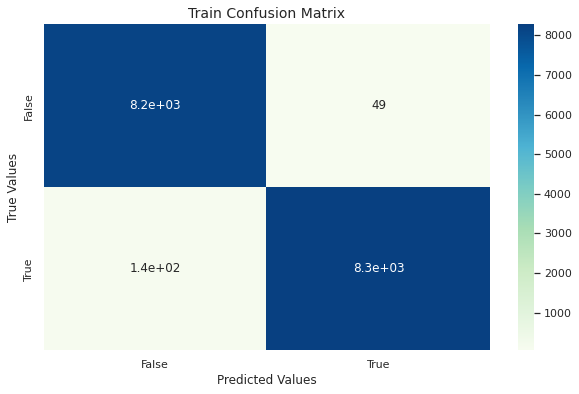

In [ ]:
conf_mtx = confusion_matrix(train_prediction, y_train)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Train Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

In [ ]:
test_prediction = model.predict(X_test)
test_acc = accuracy_score(test_prediction, y_test) *100
print(f"Test(train.csv) data accuracy: {test_acc}%")

Test(train.csv) data accuracy: 97.54807692307692%


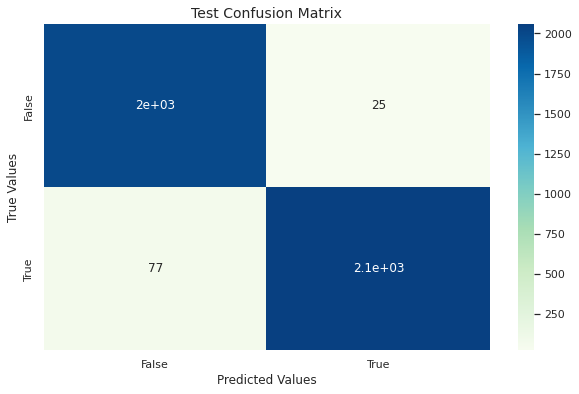

In [ ]:
conf_mtx = confusion_matrix(test_prediction, y_test)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Test Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

# Output (test.csv)

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test = test.fillna('')

In [ ]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [ ]:
test.title = test.title.apply(cleaning_data)
test.author = test.author.apply(cleaning_data)
test.text =  test.text.apply(cleaning_data)

In [ ]:
test.head()

,id,title,author,text
0,20800,specter trump loosens tonguespurse stringssili...,david streitfeld,palo altocalifyears scorning political process...
1,20801,russian warships ready strike terrorists near ...,,russian warships ready strike terrorists near ...
2,20802,native american leaders vow stay winterfile la...,common dreams,videosnative american leaders vow stay winterf...
3,20803,tim tebow attempt another comebacktime basebal...,daniel victor,first dont succeedtry different sporttim tebow...
4,20804,keiser reportmeme wars,truth broadcast network,mins ago 1 views 0 comments 0 likesfirst time ...


In [ ]:
test.text =  test.text.apply(lemmatization)
test.title =  test.title.apply(lemmatization)

In [ ]:
test['content'] = test.author + ' ' + test.title

In [ ]:
test.drop(['title' , 'author'] , axis =1 ,inplace = True)

In [ ]:
test.head()

,id,text,content
0,20800,palo altocalifyear scorn polit processsilicon ...,david streitfeld specter trump loosen tonguesp...
1,20801,russian warship readi strike terrorist near al...,russian warship readi strike terrorist near a...
2,20802,videosn american leader vow stay winterfil law...,common dreams nativ american leader vow stay w...
3,20803,first dont succeedtri differ sporttim tebowhei...,daniel victor tim tebow attempt anoth comeback...
4,20804,min ago 1 view 0 comment 0 likesfirst time his...,truth broadcast network keiser reportmem war


In [ ]:
X_final = test.content.values
print(X_final)

['david streitfeld specter trump loosen tonguespurs stringssilicon valleynew york time'
 ' russian warship readi strike terrorist near aleppo'
 'common dreams nativ american leader vow stay winterfil lawsuit polic'
 ... 'mike mcphate california todaywhatexactlysushinew york time'
 ' us marin deploy russian border norway'
 'teddy wayne awkward sexonscreennew york time']


In [ ]:
X_final = vectorizer.transform(X_final)
print(X_final)

  (0, 35036)	0.15340871660187363
  (0, 31729)	0.214794161952605
  (0, 31060)	0.15192324427913273
  (0, 29634)	0.6028770346406246
  (0, 17848)	0.638520429709823
  (0, 7512)	0.36888955454913197
  (1, 33782)	0.48855163894042253
  (1, 30695)	0.35828999243322207
  (1, 29652)	0.35215916355567206
  (1, 26454)	0.3048783731807855
  (1, 24665)	0.3774888824853884
  (1, 20336)	0.37841530170718346
  (1, 933)	0.3609469234320048
  (2, 33481)	0.3393302230436408
  (2, 29364)	0.3518853963791725
  (2, 23061)	0.2533336583722103
  (2, 20270)	0.36471755737964173
  (2, 17050)	0.2863050219444288
  (2, 17010)	0.35351541252968377
  (2, 9012)	0.41790974737206843
  (2, 6152)	0.35031064578398385
  (2, 1197)	0.24397747935863934
  (3, 35036)	0.1270810918608222
  (3, 33100)	0.3877684005768615
  (3, 31060)	0.1258505526262567
  :	:
  (5196, 28086)	0.23829361405927466
  (5196, 27821)	0.27871141378268866
  (5196, 25535)	0.31391795355613283
  (5196, 21359)	0.20599050990412712
  (5196, 21260)	0.2932654489641651
  (5196, 18

In [ ]:
model_full = LogisticRegression(random_state = 1)
model_full.fit(X, y)
final_prediction = model_full.predict(X_final)

In [ ]:
output = pd.DataFrame({'id': test.id, 'label': final_prediction})
print(output)

         id  label
0     20800      0
1     20801      1
2     20802      1
3     20803      0
4     20804      1
...     ...    ...
5195  25995      0
5196  25996      0
5197  25997      0
5198  25998      1
5199  25999      0

[5200 rows x 2 columns]


##Trying with User Input

In [ ]:
Title = input('Enter News Title: ')

Author = input('\nEnter News Author: [No Author: press enter] ')

use_text = input('\nUse news text? [y | n]: ')
Text = ''
if use_text == 'y':
  Text = input('\nEnter News Text: ')

Enter News Title: Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It

Enter News Author: [No Author: press enter] 

Use news text? [y | n]: n


In [ ]:
input_data = {'title': [Title], 'author': [Author], 'text': [Text]}
input = pd.DataFrame(input_data)
input.title = input.title.apply(cleaning_data)
input.author = input.author.apply(cleaning_data)
input.text =  input.text.apply(cleaning_data)
input

,title,author,text
0,coronavirus bioweaponchina stole coronavirus c...,,


In [ ]:
input.text =  input.text.apply(lemmatization)
input.title =  input.title.apply(lemmatization)
input['content'] = input.author + ' ' + input.title
input.drop(['title' , 'author'] , axis =1 ,inplace = True)
input

,text,content
0,,coronaviru bioweaponchina stole coronaviru ca...


In [ ]:
X_input = input.content.values
print(X_input)

[' coronaviru bioweaponchina stole coronaviru canada weapon']


In [ ]:
X_input = vectorizer.transform(X_input)
print(X_input)

  (0, 33994)	0.5095511596966967
  (0, 29508)	0.6513735583010762
  (0, 4489)	0.562201123440665


In [ ]:
input_prediction = model_full.predict(X_input)
input_prediction

array([1])

Fake - 1

Real - 0